### Name : Anish Kumar Barik
### Reg. No. : 24MDT0170
### Course Name : Data Mining and Machine Leaning Lab

In [66]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
data= pd.read_csv("Book1.csv")
data


,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus
0,13300000,7420,4,2,3,2,furnished
1,12250000,8960,4,4,4,3,furnished
2,12250000,9960,3,2,2,2,semi-furnished
3,12215000,7500,4,2,2,3,furnished
4,11410000,7420,4,1,2,2,furnished
...,...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0,semi-furnished
245,4550000,5360,3,1,2,2,unfurnished
246,4550000,3520,3,1,1,0,semi-furnished
247,4550000,8400,4,1,4,3,unfurnished


In [67]:
data=data.drop('furnishingstatus',axis= 1)
data


,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
244,4550000,5320,3,1,2,0
245,4550000,5360,3,1,2,2
246,4550000,3520,3,1,1,0
247,4550000,8400,4,1,4,3


### 3. Use MinMaxScaler() to scale the data to 0 to 1 range.

In [69]:
from sklearn import preprocessing
MM = preprocessing.MinMaxScaler()
x = MM.fit_transform(data)
x

array([[1.00000000e+00, 3.56776557e-01, 5.00000000e-01, 3.33333333e-01,
        6.66666667e-01, 6.66666667e-01],
       [8.80095923e-01, 4.69597070e-01, 5.00000000e-01, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [8.80095923e-01, 5.42857143e-01, 2.50000000e-01, 3.33333333e-01,
        3.33333333e-01, 6.66666667e-01],
       ...,
       [7.99360512e-04, 7.10622711e-02, 2.50000000e-01, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [7.99360512e-04, 4.28571429e-01, 5.00000000e-01, 0.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.13553114e-01, 0.00000000e+00, 3.33333333e-01,
        0.00000000e+00, 0.00000000e+00]])

### 4. Split the data into training and testing sets using appropriate functions. Use a 80:20 split.

In [71]:
Y = x[:,0]
X = x[:,1:]
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.20,random_state=0)


### 5. Import LinearRegression from sklearn and fit the data to find parameters.


In [73]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(Xtrain,ytrain)
m=reg.intercept_
n=reg.coef_
print("The testing error is",mean_squared_error(reg.predict(Xtest),ytest))
print("Intercept is : ",m)
print("All the parameters of the model are: ",n)

The testing error is 0.020077937566470735
Intercept is :  -0.0612118378671857
All the parameters of the model are:  [0.32033532 0.09007501 0.3199135  0.13202285 0.14958391]


### Q2. Write appropriate gradient descent algorithm and determine the values of the parameters involved in the prediction function.

In [75]:
import numpy as np
z = np.ones(len(Xtrain))
new_X_train = np.concatenate((np.array(z)[:, np.newaxis], Xtrain), axis=1)
new_X_train


array([[1.        , 0.05054945, 0.5       , 0.        , 0.66666667,
        0.33333333],
       [1.        , 0.15018315, 0.25      , 0.33333333, 0.33333333,
        0.66666667],
       [1.        , 0.27472527, 0.25      , 0.        , 0.        ,
        0.66666667],
       ...,
       [1.        , 0.08424908, 0.5       , 0.        , 0.33333333,
        0.        ],
       [1.        , 0.2967033 , 0.25      , 0.        , 1.        ,
        1.        ],
       [1.        , 0.42857143, 0.25      , 0.        , 0.33333333,
        0.66666667]])

In [76]:
def gd(data,yt,parameters,lrate):
    slopes = np.zeros(6)
    for j in range(len(data)):
        for k in range(6):
            slopes[k]+= (1/len(data))*((data[j]*parameters).sum()-yt[j])*data[j][k]
    parameters = parameters-lrate*slopes
    return parameters
parameters = np.zeros(6)
lrate = 0.9
iter_value = 1500
for i in range(iter_value):
    parameters = gd(new_X_train,ytrain,parameters,lrate)
print(parameters)


[-0.06121184  0.32033532  0.09007501  0.3199135   0.13202285  0.14958391]


### Q3. Implement the Linear regression problem for Trainingsetheights200 dataset using stochastic gradient descent and mini batchgradient descent and present the results and plots of your model. Also find the testing error in both the cases.

In [78]:
data1= pd.read_csv("Training_set_heights200.csv")
data1


,Height,Weight
0,127.8296,67.63371
1,123.4114,65.95421
2,134.4043,66.14316
3,155.9981,73.45251
4,136.1354,69.30943
...,...,...
194,135.2500,68.41222
195,109.5143,66.49607
196,139.6043,67.84894
197,134.3672,67.27839


### 2. Use MinMaxScaler() to scale the data to 0 to 1 range.


In [80]:
from sklearn import preprocessing
MM1 = preprocessing.MinMaxScaler()
x1 = MM1.fit_transform(data1)
print(x1)


[[0.55738247 0.53872437]
 [0.49548119 0.40985671]
 [0.64949743 0.4243548 ]
 [0.95203779 0.98519959]
 [0.67375104 0.66730199]
 [0.43738377 0.34466862]
 [0.34908247 0.50992308]
 [0.60113031 0.68675989]
 [0.73623936 0.75590033]
 [0.37092206 0.46972895]
 [0.46437503 0.39039343]
 [0.60406131 0.59593869]
 [0.79874449 0.71333218]
 [0.47575998 0.35674282]
 [0.49263425 0.55948975]
 [0.62913734 0.59716023]
 [1.         0.60338839]
 [0.54525776 0.3960699 ]
 [0.64237588 0.57734553]
 [0.73658121 0.8075786 ]
 [0.54945671 0.68787861]
 [0.75975041 0.65702327]
 [0.55166617 0.80390401]
 [0.73663586 0.72803437]
 [0.34895497 0.56025398]
 [0.64312404 0.59457137]
 [0.57725078 0.4842585 ]
 [0.41982578 0.39622106]
 [0.60528863 0.44350885]
 [0.60712822 0.32756095]
 [0.81467165 0.79411713]
 [0.38697672 0.18244576]
 [0.46978589 0.62691681]
 [0.76756548 0.43440256]
 [0.48096068 0.57167827]
 [0.39468531 0.6278859 ]
 [0.51695651 0.31010646]
 [0.6818239  0.85938194]
 [0.41629793 0.45115651]
 [0.57152048 0.43224569]


### 3. Split the data into training and testing sets using appropriate functions. Use a 70:30 split.

In [82]:
X1 = x1[:,0]
Y1 = x1[:,1]
from sklearn.model_selection import train_test_split
Xtrain1,Xtest1,ytrain1,ytest1 = train_test_split(X1,Y1,test_size=0.30,
random_state=0)

### 4. Import LinearRegression from sklearn and fit the data to find intercept and coefficient.

In [84]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(Xtrain1.reshape(-1,1),ytrain1)
ml=reg.intercept_
nl=reg.coef_[0]
print("Intercept is : ",ml)
print("Coefficient is : ",nl)


Intercept is :  0.3142468206485475
Coefficient is :  0.4153220879422849


### 5. Find parameters using stochastic gradient descent as well as mini batch gradient descent.


In [86]:
import random
def gradient_descent(xt, yt, m_b, n_b, L, epochs, batch_size=None, mode="full"):
    for epoch in range(epochs):
        if mode == "stochastic":
            i = random.randint(0, len(xt) - 1) # Randomly pick a single data point
            D_m = 2 * ((m_b * xt[i] + n_b - yt[i]) * xt[i])
            D_n = 2 * (m_b * xt[i] + n_b - yt[i])
            m_b -= L * D_m
            n_b -= L * D_n
        elif mode == "mini-batch":
            batch_indices = random.sample(range(len(xt)), batch_size) # Randomly select 30 points
            D_m = 0
            D_n = 0
            for i in batch_indices:
                D_m += (2 / batch_size) * ((m_b * xt[i] + n_b - yt[i]) * xt[i])
                D_n += (2 / batch_size) * (m_b * xt[i] + n_b - yt[i])
            m_b -= L * D_m
            n_b -= L * D_n
    return m_b, n_b
m = 0
n = 0
L = 0.5
epochs = 900
batch_size = 30 # Mini-batch size
m_sgd, n_sgd = gradient_descent(Xtrain1, ytrain1, m, n, L, epochs, mode="stochastic")
print("SGD Results: ", m_sgd, n_sgd)
m_mini, n_mini = gradient_descent(Xtrain1, ytrain1, m, n, L, epochs, batch_size=batch_size, mode="mini-batch")
print("Mini-Batch GD Results: ", m_mini, n_mini)


SGD Results:  0.31179824162844677 0.16434404443412448
Mini-Batch GD Results:  0.41316433096775884 0.3208603158687665


#### 6. Plot for the predicted values in both the cases.

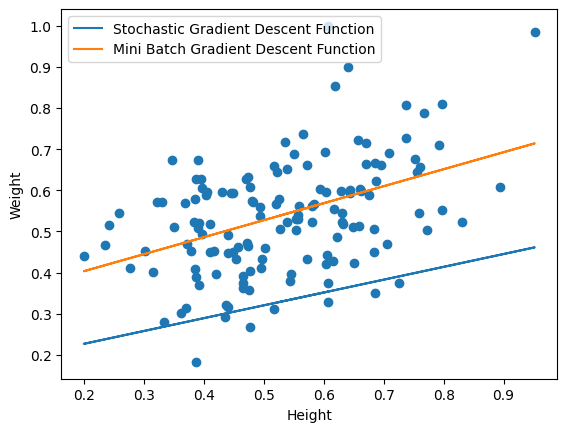

In [88]:
plt.scatter(Xtrain1.reshape(-1,1),ytrain1)
ypred1 = m_sgd*Xtrain1+n_sgd
ypred2= m_mini*Xtrain1+n_mini
plt.plot(Xtrain1,ypred1,label="Stochastic Gradient Descent Function")
plt.plot(Xtrain1,ypred2,label="Mini Batch Gradient Descent Function")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend()
plt.show()


#### 7. Find the testing error in both the cases.

In [90]:
def calculate_error(m, n, Xtest, ytest):
    y_pred = m * Xtest + n
    return mean_squared_error(ytest, y_pred)
testing_error_sgd = calculate_error(m_sgd, n_sgd, Xtest1, ytest1)
testing_error_mini = calculate_error(m_mini, n_mini, Xtest1, ytest1)
print("Testing error for stochastic: ",testing_error_sgd)
print("Testing error for mini-batch: ",testing_error_mini)


Testing error for stochastic:  0.09734531081133953
Testing error for mini-batch:  0.02707773771867766


In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
Xtrain1_reshaped = Xtrain1.reshape(-1, 1)
Xtest1_reshaped = Xtest1.reshape(-1, 1)
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(Xtrain1_reshaped)
X_test_poly = poly.fit_transform(Xtest1_reshaped)
model = LinearRegression()
model.fit(X_train_poly, ytrain1)
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
train_mse = mean_squared_error(ytrain1, y_train_pred)
test_mse = mean_squared_error(ytest1, y_test_pred)
print("Training MSE:", train_mse)
print("Testing MSE:", test_mse)


Training MSE: 0.015123017896174458
Testing MSE: 0.031124085897679933


In [92]:
print("Polynomial coefficiants:")
print(model.coef_)
print("Intercept:")
print(model.intercept_)

Polynomial coefficiants:
[ 0.         -0.27208909  0.55389291  0.08276656]
Intercept:
0.496357248121752


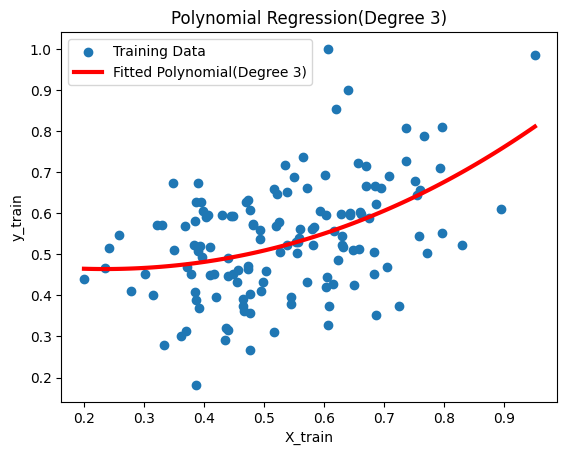

In [96]:
X_range=np.linspace(Xtrain1.min(),Xtrain1.max(),100).reshape(-1,1) 
X_range_poly=poly.transform(X_range) 
y_range_pred= model.predict(X_range_poly) 
plt.scatter(Xtrain1,ytrain1,label="Training Data") 
plt.plot(X_range,y_range_pred,color='r',linewidth=3,label="Fitted Polynomial(Degree 3)") 
plt.xlabel("X_train")
plt.ylabel("y_train")
plt.legend() 
plt.title("Polynomial Regression(Degree 3)")
plt.show()